# Example notebook for loading in data

In [1]:
"""This is an example python script for loading image and segmentation into the correct format
   Requirements: skimage, numpy
"""

import re

import numpy as np
from matplotlib import pyplot as plt
from skimage.io import imread


def main(image_path: str, labels: str, save_img_path: str):
    """Loads image and displa labels centerpoints

    Args:
        image_path (str): path to .tif file
        labels (str): string containing the labels formatted as described in the kaggle dataset
        save_img_path (str): path to save slices as .png
    """
    # Image is loading into array with orientation (z-aixs, x-axis,y-axis) so dim: (128,92,92)
    img = imread(image_path)
    print(f"img dim: {img.shape}")

    # Important labels are in format (x-axis, y-axis, z-aixs)
    pred_centerpoints = (
        labels.replace(" ", "").rstrip(";").split(";")
    )  # Removes whitespace and last ';' if applicable
    filtered_centerpoints = [
        float(item) for item in pred_centerpoints if not re.search("[a-zA-Z]", item)
    ]
    pred_centers = np.array(
        list(
            zip(
                filtered_centerpoints[::3],
                filtered_centerpoints[1::3],
                filtered_centerpoints[2::3],
            )
        )
    )

    print("Centerpoints: ", pred_centers)

    # Plots the first 4 centerpoints
    fig, axs = plt.subplots(2, 2, figsize=(6, 6))

    for i in range(min(4, len(pred_centers))):
        axs[i // 2, i % 2].imshow(
            img[int(pred_centers[i][2])]
        )  # third coordinate of labels are z-axis
        axs[i // 2, i % 2].plot(
            int(pred_centers[i][0]), int(pred_centers[i][1]), "xr", markersize=10
        )  # first and second coordinate is x and y axis
        axs[i // 2, i % 2].axis("off")  # Remove axis on images

    fig.suptitle("Center points of bugs in volume", fontsize="xx-large")
    fig.tight_layout()
    # fig.savefig(save_img_path, bbox_inches="tight")

img dim: (128, 92, 92)
Centerpoints:  [[48.61 39.14 96.19]
 [77.71 53.14 57.17]
 [58.71 73.71 59.15]
 [48.42 45.33 51.75]
 [19.84 62.44 40.23]
 [22.67 30.   53.13]
 [29.98 42.06 60.16]
 [78.57 57.98 41.85]
 [30.56 19.43 65.24]
 [29.44 59.37 47.22]]


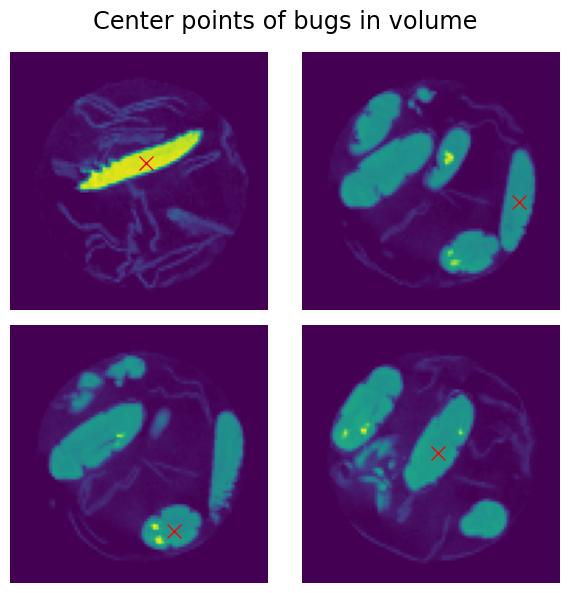

In [2]:
image_path = "../data/BugNIST_DATA/validation/mix_02_006.tif"
save_img_path = "./example_slices.png"
labels = "bl;48.61;39.14;96.19;bl;77.71;53.14;57.17;pp;58.71;73.71;59.15;pp;48.42;45.33;51.75; \
            pp;19.84;62.44;40.23;pp;22.67;30.00;53.13;pp;29.98;42.06;60.16;bc;78.57;57.98;41.85; \
            bc;30.56;19.43;65.24;bc;29.44;59.37;47.22"


main(image_path=image_path, labels=labels, save_img_path=save_img_path)